### This piece of code was adapted from: https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT

In [99]:
#loading the libraries
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
from transformers import BertTokenizer

In [100]:
#loading the dataset
df = pd.read_csv('/home/psaha/assignmnet/NLP/mbti_1.csv')
df.head(3)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...


/home/psaha/.conda/envs/pratim/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


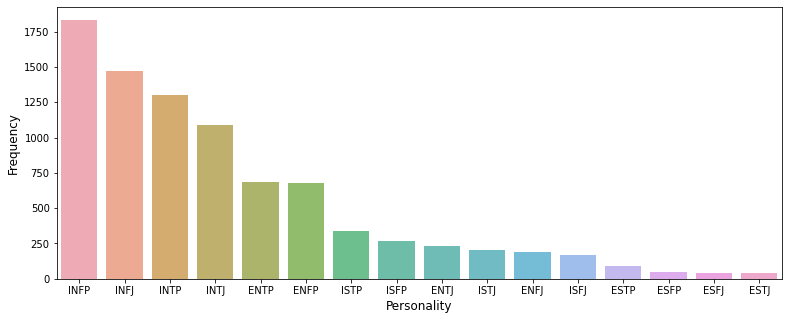

In [101]:
#visualize label frequency 
view_type = df['type'].value_counts()

plt.figure(figsize=(13,5))
sns.barplot(view_type.index, view_type.values, alpha=0.8)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Personality', fontsize=12)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [6]:
#Label encoding 
import re
possible_labels = df.type.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict
df['label'] = df.type.replace(label_dict)
#removing urls
df['posts'] = df['posts'].apply(lambda x:re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"",x))
df['posts'] = df['posts'].apply(lambda x:re.sub("[^a-zA-Z]", " ", x))
df['posts'] = df['posts'].apply(lambda x: re.sub(' +', ' ', x).lower())
df['label'].value_counts()

6     1832
0     1470
2     1304
3     1091
1      685
7      675
9      337
8      271
4      231
11     205
5      190
10     166
12      89
13      48
15      42
14      39
Name: label, dtype: int64

In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
#ref: https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
token = tokenizer.encode_plus(
    df['posts'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

2022-11-27 20:38:13.233390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 20:38:15.994150: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15401 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:04:00.0, compute capability: 6.0


In [14]:
#ref: https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(X_train)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [15]:
df.head(3)

,type,posts,label
0,INFJ,enfp and intj moments sportscenter not top te...,0
1,ENTP,i m finding the lack of me in these posts ver...,1
2,INTP,good one of course to which i say i know that...,2


In [16]:
X_train, X_val, y_train, y_val = train_test_split(df.posts, 
                                                  df.label.values, 
                                                  test_size=0.20, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

In [17]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
X_input_ids = np.zeros((len(X_train), 256))
X_attn_masks = np.zeros((len(X_train), 256))

In [18]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
X_input_ids, X_attn_masks = generate_training_data(X_train, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [19]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
labels = np.zeros((len(y_train), 16))
labels.shape

(6940, 16)

In [20]:
#ref: https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
labels[np.arange(len(y_train)), y_train] = 1 # one-hot encoded target tensor
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [21]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(16,), dtype=tf.float64, name=None))>

In [22]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
def EmotionDetectionDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [23]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
dataset = dataset.map(EmotionDetectionDatasetMapFunction) # converting to required format for tensorflow dataset

In [25]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True) # batch size, drop any left out tensor

In [27]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
train_portion = 0.8
train_size = int((len(X_train)//16)*train_portion) # for each 16 batch of data we will have len(df)//16 samples, take 80% of that for train.
train_size

346

In [28]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [29]:
from transformers import TFBertModel

In [30]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
model = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights

# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
intermediate_layer2 = tf.keras.layers.Dense(256, activation='relu', name='intermediate_layer')(intermediate_layer)

output_layer = tf.keras.layers.Dense(16, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

emotion_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
emotion_model.summary()

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [31]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT
optim = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [32]:
emotion_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [33]:
import keras
weightfilepath = 'model_weight.ckpt'
checkpoint = keras.callbacks.ModelCheckpoint(weightfilepath,save_weights_only=True,verbose=1,save_best_only=True)
hist = emotion_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=25,
    callbacks=[checkpoint]
)

Epoch 1/25
346/346 [==============================] - ETA: 0s - loss: 2.2465 - accuracy: 0.2520
Epoch 1: val_loss improved from inf to 1.99780, saving model to model_weight.ckpt
346/346 [==============================] - 193s 531ms/step - loss: 2.2465 - accuracy: 0.2520 - val_loss: 1.9978 - val_accuracy: 0.3836
Epoch 2/25
346/346 [==============================] - ETA: 0s - loss: 1.8896 - accuracy: 0.4160
Epoch 2: val_loss improved from 1.99780 to 1.81616, saving model to model_weight.ckpt
346/346 [==============================] - 182s 525ms/step - loss: 1.8896 - accuracy: 0.4160 - val_loss: 1.8162 - val_accuracy: 0.4397
Epoch 3/25
346/346 [==============================] - ETA: 0s - loss: 1.7472 - accuracy: 0.4662
Epoch 3: val_loss improved from 1.81616 to 1.54044, saving model to model_weight.ckpt
346/346 [==============================] - 181s 524ms/step - loss: 1.7472 - accuracy: 0.4662 - val_loss: 1.5404 - val_accuracy: 0.5424
Epoch 4/25
346/346 [==============================] -

In [35]:
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

# dice_coef = hist.history["accuracy"]
# val_dice_coef = hist.history["val_accuracy"]

acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]

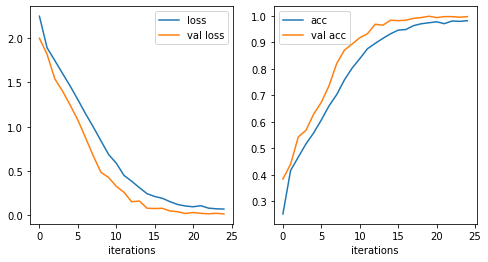

In [41]:
plt.figure(figsize = (8,4))
plt.subplot(121)
plt.plot(loss,label = "loss")
plt.plot(val_loss,label  = "val loss")
plt.xlabel("iterations")
# plt.ylabel("X axis label")
plt.legend()
plt.subplot(122)
plt.plot(acc,label = "acc")
plt.plot(val_acc,label  = "val acc")
plt.xlabel("iterations")
# plt.ylabel("X axis label")
plt.legend()
plt.show()

In [42]:
emotion_model.load_weights('model_weight.ckpt')

In [43]:
#ref:https://github.com/theartificialguy/NLP-with-Deep-Learning/tree/master/BERT/Multi-Class%20classification%20TF-BERT

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=list(df.type)):
    probs = model.predict(processed_data)
    return np.argmax(probs,axis = 1)[0]
    # return classes[np.argmax(probs)]

In [59]:
X_val =  X_val.reset_index(drop = True)

In [93]:
gt = []
pred_probability = []
for i in range(len(X_val)):
#     print(X_val[i])
    probs = emotion_model.predict(prepare_data(X_val[i],tokenizer))
    pred_probability.append(np.argmax(probs,axis = 1)[0])
    gt.append(y_val[i])
#     break

1/1 [==============================] - 0s 41ms/step


In [98]:
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,confusion_matrix,accuracy_score


 Precision (Weighted): 0.51
 Recall (Weighted): 0.50
 F1-Score (Weighted): 0.50
Accuracy Score: 0.50
              precision    recall  f1-score   support

           0       0.42      0.58      0.48       294
           1       0.50      0.39      0.44       137
           2       0.49      0.56      0.53       261
           3       0.46      0.48      0.47       218
           4       0.57      0.35      0.43        46
           5       0.78      0.47      0.59        38
           6       0.56      0.60      0.58       367
           7       0.63      0.41      0.50       135
           8       0.45      0.35      0.40        54
           9       0.57      0.43      0.49        67
          10       0.69      0.33      0.45        33
          11       0.44      0.37      0.40        41
          12       0.67      0.33      0.44        18
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         8
          15       0.33      0.12 

<AxesSubplot:>

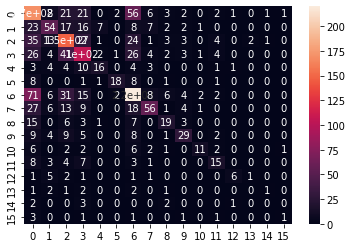

In [109]:
print(" Precision (Weighted): %.2f"%(precision_score(gt,pred_probability,average = 'weighted')))
print(" Recall (Weighted): %.2f"%(recall_score(gt,pred_probability,average = 'weighted')))
print(" F1-Score (Weighted): %.2f"%(f1_score(gt,pred_probability,average = 'weighted')))
print("Accuracy Score: %.2f"%(accuracy_score(gt, pred_probability)))
print(classification_report(gt,pred_probability))
cf_matrix = confusion_matrix(gt, pred_probability)
sns.heatmap(cf_matrix, annot=True)

In [118]:
print(len(y_val))
unique, counts = np.unique(y_val, return_counts=True)
dict(zip(unique, counts))

1735


{0: 294,
 1: 137,
 2: 261,
 3: 218,
 4: 46,
 5: 38,
 6: 367,
 7: 135,
 8: 54,
 9: 67,
 10: 33,
 11: 41,
 12: 18,
 13: 10,
 14: 8,
 15: 8}

In [114]:
unique, counts = np.unique(pred_probability, return_counts=True)
dict(zip(unique, counts))

{0: 408,
 1: 109,
 2: 298,
 3: 227,
 4: 28,
 5: 23,
 6: 392,
 7: 89,
 8: 42,
 9: 51,
 10: 16,
 11: 34,
 12: 9,
 13: 3,
 14: 3,
 15: 3}